In [0]:
import numpy as np  # 計算するやつ
import pandas as pd # 表を扱うやつ
import matplotlib   # グラフにするやつ
import matplotlib.pyplot as plt
%matplotlib inline
import warnings     # 警告を消すやつ
warnings.filterwarnings('ignore')

In [0]:
# 機械学習ライブラリのScikit-learnからデータセットを入手
from sklearn.datasets import load_iris                # アヤメのデータセット
from sklearn.model_selection import train_test_split  # 学習用データとテスト用データを分ける
from sklearn.svm import LinearSVC                     # 分類を行う線形SVMアルゴリズム

# アヤメの分類ってどうやるの
__アヤメの萼片や花びら幅や長さの数値__ を用いて __アヤメの種類を分類する__。
さっきインポートしたデータに、誰かが集めたアヤメのデータがあるから、それをもとに機械学習によって分類をしていく。


## インスタンスを生成
アヤメのインスタンスを生成する。

In [0]:
ayame = load_iris()

## データの中身を見てみる

In [5]:
print("与えられたデータ")
print(ayame.data)
print(ayame.data.shape)
print("-----------------")
print("予測するデータ")
print(ayame.target)
print(ayame.target.shape)
print(ayame.target_names)

与えられたデータ
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

## で、何するの
与えられたデータは、__数値が書かれた150×4の二次元配列__。  
予測するデータは__0,1,2と書かれた150×1の一次元配列__。  
0: setosa  1: versicolor  2: virginica  
に対応している。  
    
与えられた「数値が書かれた二次元配列」を「学習用と予想用に振り分けて」  
「どれが0,1,2に対応するのか」を「機械学習アルゴリズム」に通すことで「予想していく」  
OK?

# Pandasでデータをわかりやすくする
今の配列のままでは、なんのデータなのかよくわからない。  
そんなときに、__表を列ごとに名前をつけて見やすく__できたり、__平均値や標準偏差などを自動で出してくれる__のがPandasさん。

## 配列をDataFrameに変換
1.DataFrameの第一引数にデータセット、第二引数にカラムの名前を与える。  
2.DataFrameの第一引数に目的変数、第二引数にカラムの名前を与える。  
3.1と2のDataFrameを横に結合したDataFrameを作る。

In [0]:
ayame_data = pd.DataFrame(ayame.data, columns=["がく片の長さ", "がく片の幅", "花びらの長さ", "花びらの幅"])
ayame_target = pd.DataFrame(ayame.target, columns=["花の種類"])
ayame_all = pd.concat([ayame_data,ayame_target], axis=1) 
# axisは「軸」を指定する引数。axis=0は「行」、axis=1は「列」。今回は列を追加したかったので、axis=1

In [11]:
ayame_all.head(10)  # 最初の10行を表示

,がく片の長さ,がく片の幅,花びらの長さ,花びらの幅,花の種類
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [13]:
ayame_all.describe()  # 平均値を出してくれる

,がく片の長さ,がく片の幅,花びらの長さ,花びらの幅,花の種類
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# データセットを分割する
## __説明変数__と__目的変数__
目的変数が、今回求めたい「花の種類」、説明変数は、目的変数を予測するための各要素。今回の場合がく片の長さなど。  
## まずは学習用とテスト用にデータを分ける
学習用データを使って学習させてモデルを作成して、  
テスト用データを使ってモデルの正確さを確かめる。  
というのが機械学習の流れ。  
どうわけるかで学習に大きな影響が……
## train_test_split関数を使う
ttsさんがデータを適当にシャッフルしてくれる。  
使う変数は4つ。
- 学習用の説明変数
- 学習用の目的変数
- テスト用の説明変数
- テスト用の目的変数

In [0]:
exp_train, exp_test, obj_train, obj_test = train_test_split(ayame_data, ayame_target, test_size=0.33)
# 今回は全体の三分の一をテスト用に使うので、test_size=0.33

In [20]:
exp_train.head(10)

,がく片の長さ,がく片の幅,花びらの長さ,花びらの幅
92,5.8,2.6,4.0,1.2
54,6.5,2.8,4.6,1.5
75,6.6,3.0,4.4,1.4
66,5.6,3.0,4.5,1.5
144,6.7,3.3,5.7,2.5
102,7.1,3.0,5.9,2.1
32,5.2,4.1,1.5,0.1
27,5.2,3.5,1.5,0.2
3,4.6,3.1,1.5,0.2
67,5.8,2.7,4.1,1.0


In [18]:
obj_train.head(10)

,花の種類
92,1
54,1
75,1
66,1
144,2
102,2
32,0
27,0
3,0
67,1


In [21]:
exp_train.describe()

,がく片の長さ,がく片の幅,花びらの長さ,花びらの幅
count,100.00000,100.00000,100.000000,100.000000
mean,5.90600,3.06400,3.887000,1.252000
std,0.82729,0.41256,1.772783,0.776353
min,4.40000,2.20000,1.200000,0.100000
25%,5.20000,2.80000,1.600000,0.300000
50%,5.90000,3.00000,4.500000,1.400000
75%,6.40000,3.30000,5.300000,1.900000
max,7.90000,4.40000,6.700000,2.500000


# データをグラフで可視化する
## 特徴量の選択
__特徴量__とは、まあ今回の場合は説明変数のこと。  
説明変数を組み合わせてグラフ上の分布を見ることで、適切な組み合わせがわかるかもしれない。

## 散布図を描く
matplotlibのscatter関数を使う。引数は以下。
1. 横軸にしたいデータ
1. 縦軸にしたいデータ
1. label = ラベル（凡例）
1. cmap = カラーマップの種類

今回は三種類の目的変数別に色を分けて描いていく。

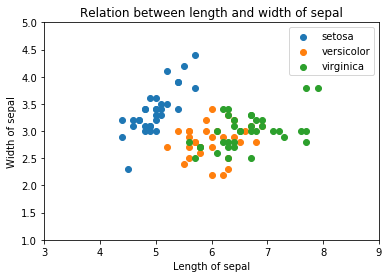

In [23]:
# がく片の長さと幅を用いたプロット
plt.scatter(exp_train[obj_train["花の種類"]==0]["がく片の長さ"], exp_train[(obj_train == 0).values]["がく片の幅"],label="setosa",cmap="rgb")
plt.scatter(exp_train[obj_train["花の種類"]==1]["がく片の長さ"], exp_train[(obj_train == 1).values]["がく片の幅"],label="versicolor",cmap="rgb")
plt.scatter(exp_train[obj_train["花の種類"]==2]["がく片の長さ"], exp_train[(obj_train == 2).values]["がく片の幅"],label="virginica",cmap="rgb")

## X軸の範囲を指定
plt.xlim(3,9)
## Y軸の範囲を指定
plt.ylim(1,5)

## X軸の名前
plt.xlabel("Length of sepal")
## Y軸の名前
plt.ylabel("Width of sepal")

## グラフのタイトル
plt.title("Relation between length and width of sepal")
## 凡例を出力
plt.legend()

これだと分類しにくそう……境界線をどう引いたらいいか、わからない。

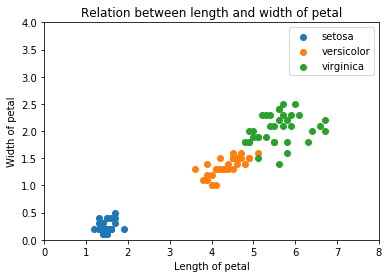

In [25]:
# 花弁の長さと幅でプロット
plt.scatter(exp_train[obj_train["花の種類"]==0]["花びらの長さ"], exp_train[(obj_train == 0).values]["花びらの幅"],label="setosa",cmap="rgb")
plt.scatter(exp_train[obj_train["花の種類"]==1]["花びらの長さ"], exp_train[(obj_train == 1).values]["花びらの幅"],label="versicolor",cmap="rgb")
plt.scatter(exp_train[obj_train["花の種類"]==2]["花びらの長さ"], exp_train[(obj_train == 2).values]["花びらの幅"],label="virginica",cmap="rgb")

plt.xlim(0,8)
plt.ylim(0,4)

plt.xlabel("Length of petal")
plt.ylabel("Width of petal")

plt.title("Relation between length and width of petal")
plt.legend()

これならわかりやすい！  
とこのように、特徴量の選択によって、分類のしやすさが変わってくるわけ。

# 機械学習アルゴリズムを使う
今回はLinearSVCを使います。（断言）
実際は、  
どのようなアルゴリズムを用いるか？  
「ハイパーパラメータ」はどうするか？  
などの段階がある。
## 特徴量の選択


In [0]:
## がく片ペアのDataFrameを作成する。
sepal_train = exp_train.loc[:,["がく片の長さ","がく片の幅"]]

## 花びらペアのDataFrameを作成
petal_train = exp_train.loc[:,["花びらの長さ","花びらの幅"]]

## モデルの構築→学習して予測する！
（モデルってなんぞ？　というのは置いといて……）


In [0]:
## それぞれモデルを構築
sepal_model = LinearSVC()
petal_model = LinearSVC()

## それぞれのモデルに「学習」させる
sepal_model.fit(sepal_train, obj_train)
petal_model.fit(petal_train, obj_train)

## それぞれのモデルで予測させて、予測値を代入させる
### モデルが「がく片ペア」を使って学習しているので、予測するときもがく片ペアを渡す。
sepal_predict = sepal_model.predict(exp_test.loc[:,["がく片の長さ","がく片の幅"]])
### 同じく花びらペアを使って学習したモデルには花びらペアを渡す。
petal_predict = petal_model.predict(exp_test.loc[:,["花びらの長さ","花びらの幅"]])

# 答え合わせ
がく片ペアで学習したモデルは正確に予測できなさそう。
花びらペアで学習したモデルはきっと良い成果を上げてくれるはず！



In [28]:
## sklearnライブラリからscore算出の関数をimport
from sklearn.metrics import accuracy_score

## scoreに結果を代入
sepal_score = accuracy_score(obj_test, sepal_predict)
petal_score = accuracy_score(obj_test, petal_predict)

print('がく片ペアモデルの正解率:{}'.format(sepal_score), '花びらペアモデルの正解率:{}'.format(petal_score), sep='\n')

がく片ペアモデルの正解率:0.8
花びらペアモデルの正解率:0.94


# だいたい流れはわかった
機械学習において事前の準備がとても大事ということですね。  
以下考察

In [0]:
# 分類の境界を可視化する関数
def ayame_border_check(H, M, model, param1, param2, resolution=0.01):
    H1_min, H1_max = H[param1].min()-0.5, H[param1].max()+0.5
    H2_min, H2_max = H[param2].min()-0.5, H[param2].max()+0.5
    H1, H2 = np.meshgrid(np.arange(H1_min, H1_max, resolution),
                           np.arange(H2_min, H2_max, resolution))
    n = np.array([H1.ravel(), H2.ravel()]).T
    Z = model.predict(n)
    Z = Z.reshape(H1.shape)
    plt.contourf(H1, H2, Z, alpha=0.5, cmap="Set2")
    plt.xlim(H1_min, H1_max)
    plt.ylim(H2_min, H2_max)
    plt.xlabel("Length")
    plt.ylabel("Width")
    plt.scatter(H[param1],H[param2], c=M["花の種類"], cmap="brg")

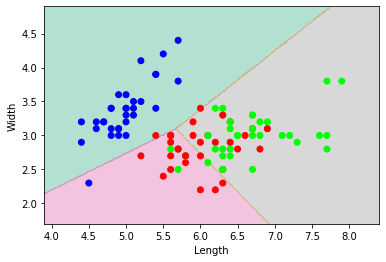

In [32]:
## がく片ペアの境界分析
ayame_border_check(exp_train, obj_train, sepal_model, "がく片の長さ", "がく片の幅")
### 多くのデータが境界を超えて分布していることがわかる

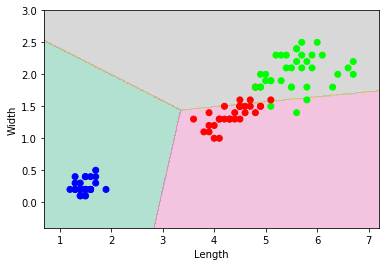

In [33]:
## 花びらペアの境界分析
ayame_border_check(exp_train, obj_train, petal_model, "花びらの長さ", "花びらの幅")
### 高い精度で分類できていることがわかる

# 結論
__データを可視化して特徴量を適切に選択することが大切！  
ということが、アヤメの分類問題を通してわかった！__